In [ ]:
# Name: Arooba Hanif
# Roll Number: Ezi-ML-B1-227
# Shift Time: Remote
# Internship Type: Hybird/Remote

# TASK 03 Linear Regression Analysis

# DATASET USED: https://www.kaggle.com/datasets/jamieleech/boston-housing-dataset

In [1]:
# importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# loading Dataset
house_price_dataset = pd.read_csv('housing.csv')

In [3]:
# Initial Data Check
house_price_dataset.head()
house_price_dataset.shape

(506, 14)

In [4]:
# Missing Values Check
house_price_dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [5]:
# Summary Statistics
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


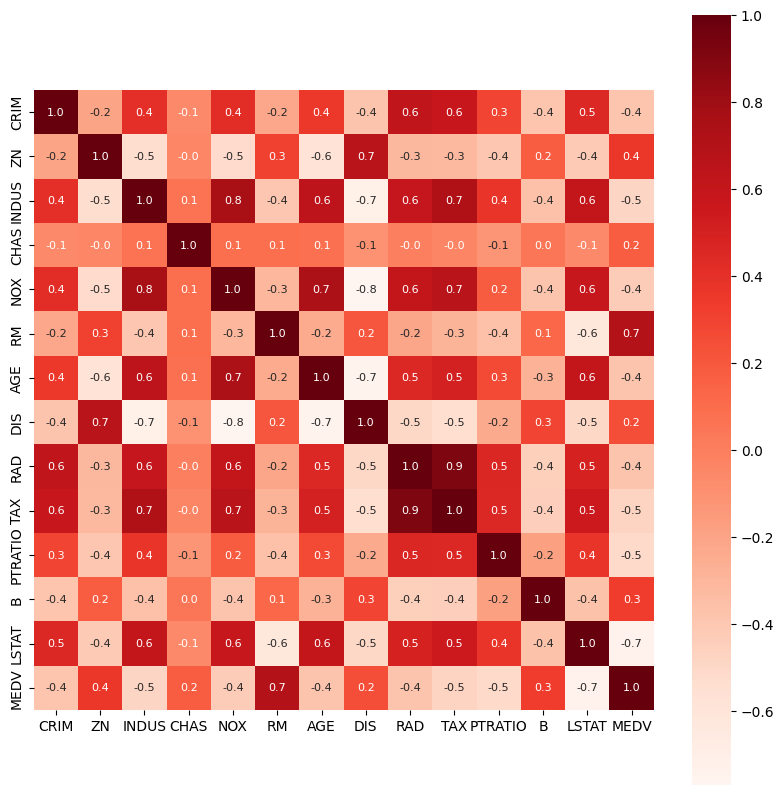

In [6]:
# Correlation Analysis
correlation = house_price_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

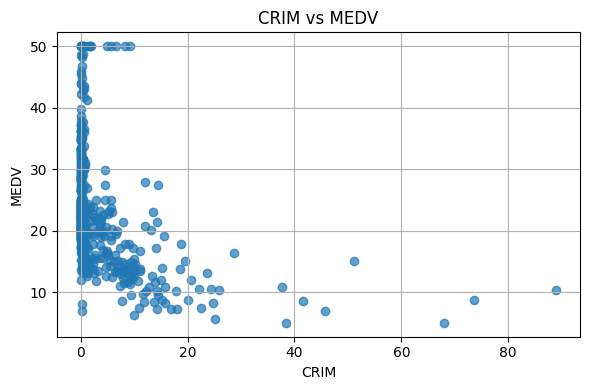

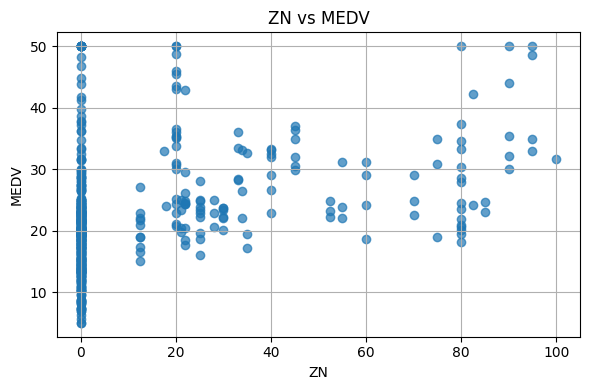

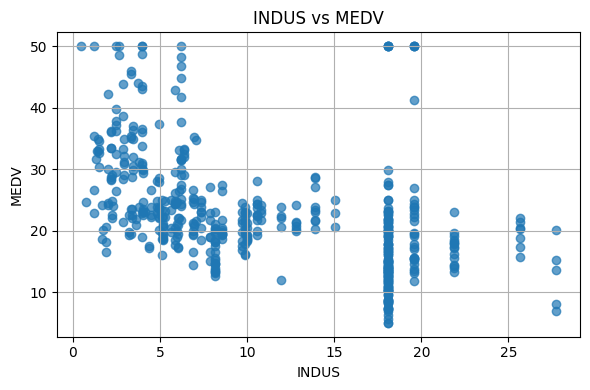

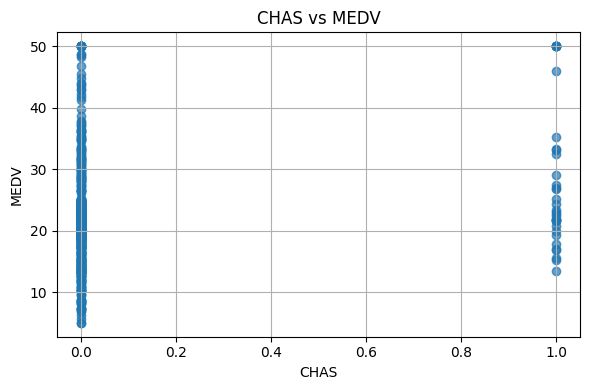

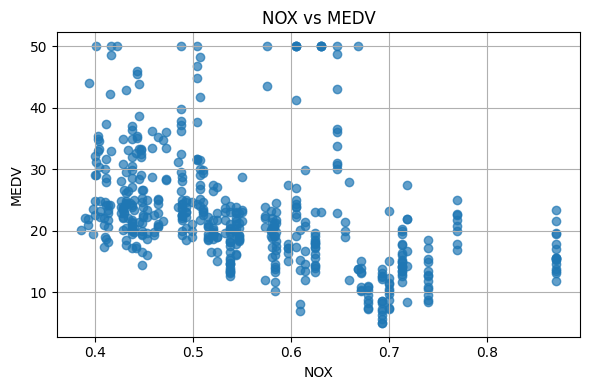

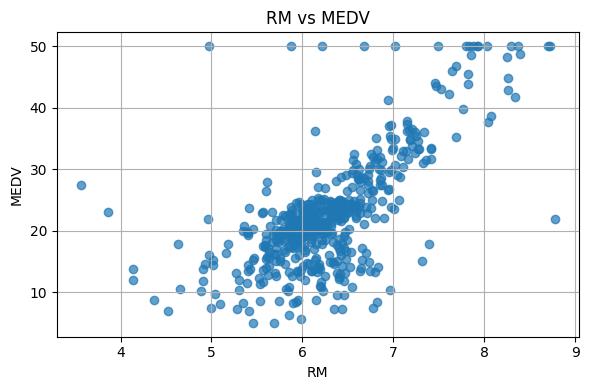

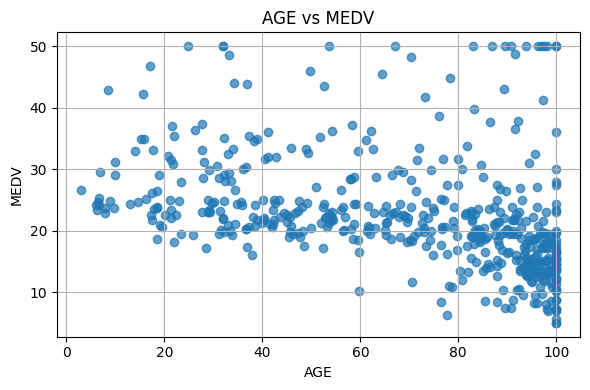

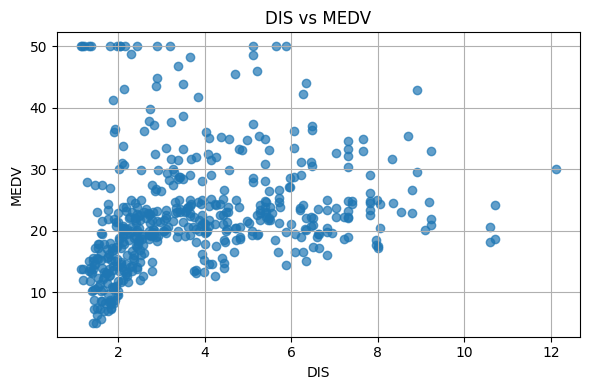

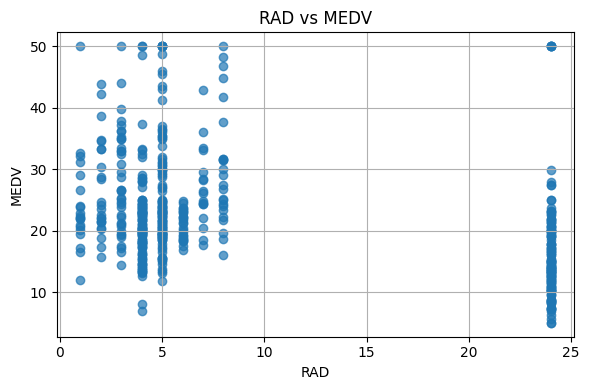

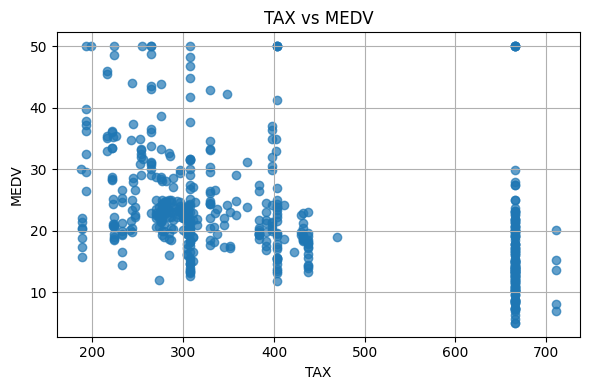

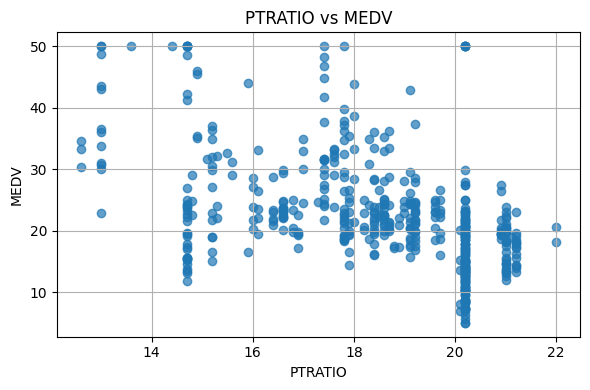

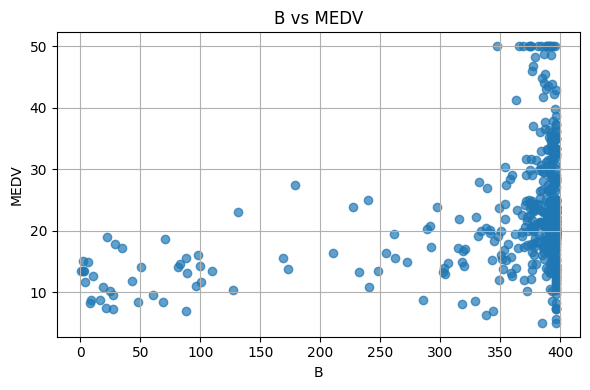

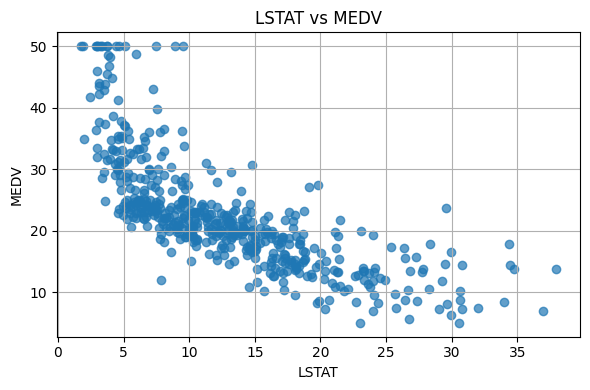

In [7]:
# Scatter Plots (Feature vs Target)
for column in house_price_dataset.columns[:-1]:
    plt.figure(figsize=(6,4))
    plt.scatter(house_price_dataset[column], house_price_dataset['MEDV'], alpha=0.7)
    plt.title(f'{column} vs MEDV')
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
# Multicollinearity Check (VIF)
X_vif = add_constant(house_price_dataset.drop(columns='MEDV'))
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]
print(vif_data)

    Feature         VIF
0     const  585.265238
1      CRIM    1.792192
2        ZN    2.298758
3     INDUS    3.991596
4      CHAS    1.073995
5       NOX    4.393720
6        RM    1.933744
7       AGE    3.100826
8       DIS    3.955945
9       RAD    7.484496
10      TAX    9.008554
11  PTRATIO    1.799084
12        B    1.348521
13    LSTAT    2.941491


In [9]:
# Feature Scaling
X = house_price_dataset.drop(columns='MEDV')
y = house_price_dataset['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
 # Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [15]:
# Evaluation
# Evaluation on training data
print("Training R2 Score:", metrics.r2_score(y_train, y_train_pred))
print("Training MAE:", metrics.mean_absolute_error(y_train, y_train_pred))
print("Training MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

# Evaluation on test data
print("\nTest R2 Score:", metrics.r2_score(y_test, y_test_pred))
print("Test MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", metrics.mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Training R2 Score: 0.7508856358979672
Training MAE: 3.3147716267832306
Training MSE: 21.641412753226323
Training RMSE: 4.652033184880168

Test R2 Score: 0.668759493535632
Test MAE: 3.1890919658878487
Test MSE: 24.291119474973513
Test RMSE: 4.928602182665336


In [16]:
# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_train_poly_pred = poly_model.predict(X_train_poly)
y_test_poly_pred = poly_model.predict(X_test_poly)

# Evaluation
print("Polynomial Train R2:", metrics.r2_score(y_train, y_train_poly_pred))
print("Polynomial Test R2:", metrics.r2_score(y_test, y_test_poly_pred))


Polynomial Train R2: 0.9409317027113498
Polynomial Test R2: 0.8055829447972152


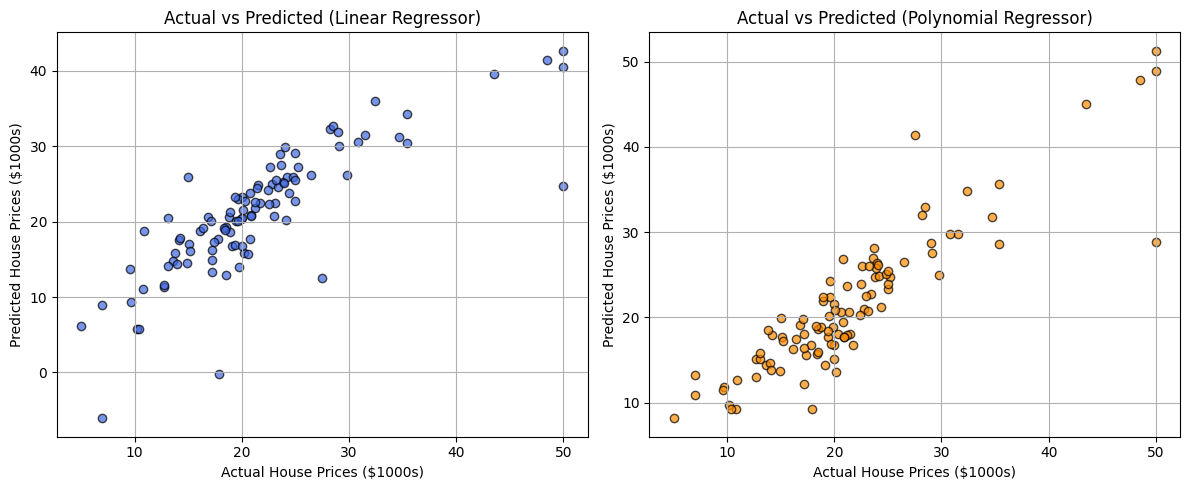

In [19]:
plt.figure(figsize=(12, 5))

# Linear Regressor
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='royalblue', edgecolor='k')
plt.xlabel("Actual House Prices ($1000s)")
plt.ylabel("Predicted House Prices ($1000s)")
plt.title("Actual vs Predicted (Linear Regressor)")
plt.grid(True)

# Polynomial Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_poly_pred, alpha=0.7, color='darkorange', edgecolor='k')
plt.xlabel("Actual House Prices ($1000s)")
plt.ylabel("Predicted House Prices ($1000s)")
plt.title("Actual vs Predicted (Polynomial Regressor)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
# Simple Linear Regression Model Evaluation
r_square_lr_test = metrics.r2_score(y_test, y_test_pred)
mae_lr_test = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_lr_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

# Polynomial Regression Model Evaluation
r_square_plr_test = metrics.r2_score(y_test, y_test_poly_pred)
mae_plr_test = metrics.mean_absolute_error(y_test, y_test_poly_pred)
rmse_plr_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_poly_pred))

# Print Errors
print(" Simple Linear Regressor Evaluation : \n")
print("R squared:", r_square_lr_test)
print("Mean Absolute Error:", mae_lr_test)
print("Root Mean Square Error:", rmse_lr_test)

print("\n Polynomial Regressor Evaluation : \n")
print("R squared:", r_square_plr_test)
print("Mean Absolute Error:", mae_plr_test)
print("Root Mean Square Error:", rmse_plr_test)


 Simple Linear Regressor Evaluation : 

R squared: 0.668759493535632
Mean Absolute Error: 3.1890919658878487
Root Mean Square Error: 4.928602182665336

 Polynomial Regressor Evaluation : 

R squared: 0.8055829447972152
Mean Absolute Error: 2.574835626416217
Root Mean Square Error: 3.7758890567533316
